**Program 10**

**Build a Deep Neural Network model for mnist data Classification**

**Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras import Sequential

**Loading the dataset**

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

**Checking Shape of the data set**

In [ ]:
print("X_train Shape : ",x_train.shape)
print("y_train Shape : ",y_train.shape)
print("X_test Shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

X_train Shape :  (60000, 28, 28)
y_train Shape :  (60000,)
X_test Shape :  (10000, 28, 28)
y_test shape :  (10000,)


**Sample image of mnist data set**

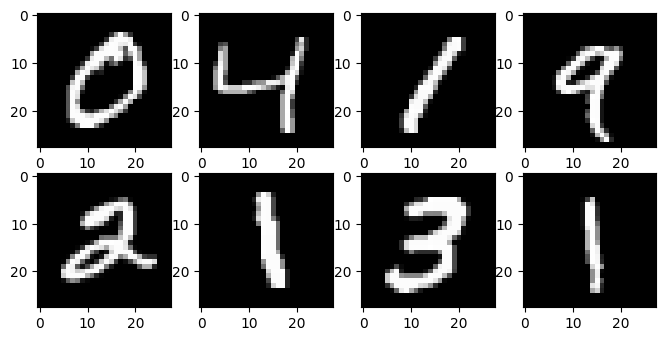

In [ ]:
plt.figure(figsize=(8,8))

for i in range(1,9):
  plt.subplot(4,4,i)
  plt.imshow(x_train[i],cmap="gray")
plt.show()

**Normalizing the data**

In [ ]:
x_train = x_train/255
x_test = x_test/255

**Creating model**

In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation="relu"),
    Dense(70,activation="relu"),
    Dense(10,activation="softmax")
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 70)                  │           9,030 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             710 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,220 (430.55 KB)

 Trainable params: 110,220 (430.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
  )

**Training the Model**

In [ ]:
hist = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8706 - loss: 0.4328
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9701 - loss: 0.0987
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9798 - loss: 0.0655
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9835 - loss: 0.0511
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9872 - loss: 0.0395


**Testing the model**

In [ ]:
loss, accuracy = model.evaluate(x_test,y_test)
print("Test loss : ",loss)
print("Test Accuarcy : ",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0958
Test loss :  0.0786210298538208
Test Accuarcy :  0.9782999753952026


In [ ]:
predicted = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Confusion Matrix**

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=np.argmax(predicted,axis=1))
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    0,    1,    1,    3,    1,    1,    0],
       [   0, 1128,    1,    0,    0,    1,    2,    0,    3,    0],
       [   3,    3, 1007,    3,    1,    0,    2,    8,    5,    0],
       [   1,    0,    5,  993,    0,    4,    0,    3,    0,    4],
       [   0,    3,    6,    1,  958,    0,    4,    3,    0,    7],
       [   3,    0,    0,    8,    0,  870,    4,    1,    4,    2],
       [   5,    2,    0,    1,    1,    3,  946,    0,    0,    0],
       [   1,    5,    8,    6,    0,    0,    0, 1006,    0,    2],
       [   6,    5,    3,   10,    2,    5,    5,    4,  932,    2],
       [   2,    5,    0,    9,    7,    3,    2,    9,    1,  971]],
      dtype=int32)>

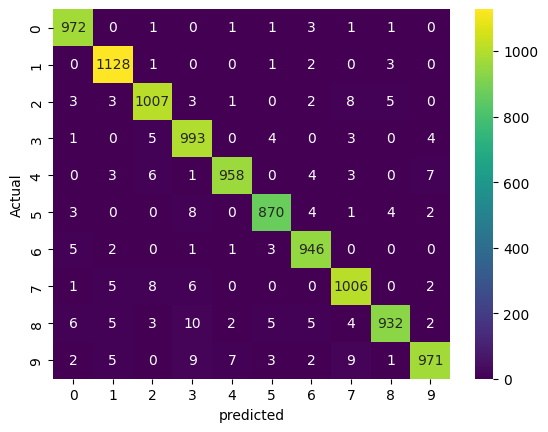

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d",cmap = 'viridis')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()